In [1]:
import tensorflow as tf
from google.colab import drive
from google.colab import files
import os
import cv2
import random
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filepath=os.listdir('drive/MyDrive/MFCC')
for sub in filepath:
  print(sub)

Person 1
Person 2
Person 3
Person 4


In [4]:
train_dir='drive/MyDrive/MFCC'
training_data=[]


In [5]:
def create_trainingdata():
    categories=os.listdir(train_dir)
    for sub in categories:
        path=os.path.join(train_dir,sub)
        class_num=categories.index(sub)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(250,250))
            training_data.append([new_array,class_num])

In [6]:
create_trainingdata()

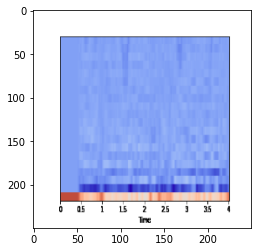

In [7]:
plt.imshow(training_data[1][0])

In [8]:
random.shuffle(training_data)

In [9]:
X=[]
Y=[]
for features,label in training_data:
    X.append(features)
    Y.append(label)

X=np.array(X).reshape(-1,250,250,3)
Y=np.array(Y).reshape(-1,1)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [11]:
x_test.shape

(760, 250, 250, 3)

In [12]:
cnn=tf.keras.Sequential([
        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(250,250,3)),
        tf.keras.layers.MaxPooling2D(2,2),
            
        tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.04),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(5, activation="softmax")
        ])

cnn.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])   

In [13]:
model1=cnn.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
72/72 [==============================] - 31s 203ms/step - loss: 5.9047 - accuracy: 0.2465 - val_loss: 1.3043 - val_accuracy: 0.2408
Epoch 2/100
72/72 [==============================] - 13s 179ms/step - loss: 1.1159 - accuracy: 0.5101 - val_loss: 0.9577 - val_accuracy: 0.6671
Epoch 3/100
72/72 [==============================] - 13s 180ms/step - loss: 0.7123 - accuracy: 0.7395 - val_loss: 0.5845 - val_accuracy: 0.7882
Epoch 4/100
72/72 [==============================] - 13s 181ms/step - loss: 0.4958 - accuracy: 0.7877 - val_loss: 0.4860 - val_accuracy: 0.7987
Epoch 5/100
72/72 [==============================] - 13s 182ms/step - loss: 0.4434 - accuracy: 0.8298 - val_loss: 0.4302 - val_accuracy: 0.8382
Epoch 6/100
72/72 [==============================] - 13s 182ms/step - loss: 0.4121 - accuracy: 0.8268 - val_loss: 0.3060 - val_accuracy: 0.8039
Epoch 7/100
72/72 [==============================] - 13s 182ms/step - loss: 0.3018 - accuracy: 0.9254 - val_loss: 0.2087 - val_accuracy:

In [17]:
cnn.save("CNNMFCC.h5")

In [15]:
test_loss,test_acc=cnn.evaluate(x_test,y_test)

24/24 [==============================] - 2s 66ms/step - loss: 0.0582 - accuracy: 0.9908


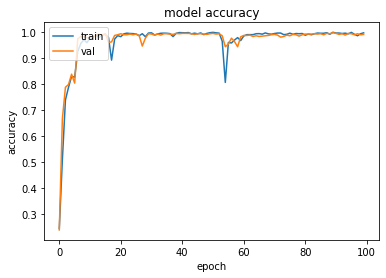

In [18]:
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
print(training_data[100])

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

In [22]:
prediction_data=training_data[100][0].reshape(-1,250,250,3)
prediction=cnn.predict(prediction_data)

In [23]:
print(prediction)

[[1.4248703e-32 1.3326972e-03 9.9866736e-01 8.9139129e-13 3.3612439e-25]]


In [27]:
prob=np.array(prediction)
labels = np.argmax(prob, axis=-1)    
print(labels)

[2]


In [33]:
model_pred=cnn.predict(x_test)
model_pred=np.argmax(model_pred[:10],axis=1)
actual=y_test[:10].reshape(-1)


print(model_pred)
print(actual)

[2 3 0 0 1 1 3 0 1 1]
[2 3 0 0 1 1 3 0 1 1]
